In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Prepare data

In [2]:
names = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'S6', 'C6', 'S7', 'C7', 'CLASS']

dataset_train = pd.read_csv("training_data_6mln.csv")
dataset_train.head()

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  S6  C6  S7  C7  CLASS
0   2   9   3   4   3   1   1   5   4  11   2   5   3   7      1
1   3   7   1  11   1   8   4   9   1  12   2   8   3   8      3
2   3   5   4   6   4  10   2  12   1   7   3   9   3   1      0
3   1  12   2   8   2   3   1  13   4  10   2  13   3   1      1
4   3   1   3   6   4   9   3   7   2   3   3  13   1   3      1

## Split dataset into train and test data

In [3]:
x_values = dataset_train.drop(['CLASS'], axis=1).values
y_values = dataset_train.CLASS.values

In [4]:
test_size = 0.2
random_state = None
shuffle = False

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=test_size, random_state=random_state, shuffle=shuffle)

print('Shape of Training Set:', x_train.shape)
print('Shape of Testing Set:', x_test.shape)

Shape of Training Set: (4800000, 14)
Shape of Testing Set: (1200000, 14)


In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 1. NEURAL NETWORK

In [7]:
from keras.models import Sequential
from keras.layers import Dense

2022-10-26 02:03:16.915780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model = Sequential()
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-10-26 02:03:24.814676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
history = model.fit(x_train, y_train,
                    epochs=2, batch_size=256,
                    verbose=1, validation_data=(x_test, y_test),
                    shuffle=shuffle)

Epoch 1/2
18750/18750 [==============================] - 19s 982us/step - loss: -313934.0000 - accuracy: 0.4382 - val_loss: -1109757.3750 - val_accuracy: 0.4382
Epoch 2/2
18750/18750 [==============================] - 18s 963us/step - loss: -3468232.7500 - accuracy: 0.4382 - val_loss: -6910565.5000 - val_accuracy: 0.4382


In [10]:
score = model.evaluate(x_test, y_test, batch_size=256)
score[1]

4688/4688 [==============================] - 3s 618us/step - loss: -6910565.5000 - accuracy: 0.4382


0.4381841719150543

## 2. Multilayer perceptron Classifier

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
model = MLPClassifier(hidden_layer_sizes=(50, 50),
                      activation="tanh", solver='adam', alpha=0.001,
                      batch_size='auto', learning_rate="adaptive",
                      learning_rate_init=0.01, max_iter=10,
                      shuffle=shuffle, tol=1e-6, verbose=True)
model.fit(x_train, y_train)

Iteration 1, loss = 1.22615185
Iteration 2, loss = 1.08977687
Iteration 3, loss = 1.07880029
Iteration 4, loss = 1.07492979
Iteration 5, loss = 1.07286416
Iteration 6, loss = 1.07107330
Iteration 7, loss = 1.07053575
Iteration 8, loss = 1.07019379
Iteration 9, loss = 1.07011783
Iteration 10, loss = 1.06992941


/Users/artemkozak/PycharmProjects/poker-ai/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=10,
              shuffle=False, tol=1e-06, verbose=True)

In [13]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.55543

In [14]:
confusion_matrix(y_test, y_pred)

array([[106061, 101198,      3,      0,    169,   1386,      0,      0,
             1,      0],
       [ 51434, 432247,  32986,    642,   5723,   2669,    108,      0,
            12,      0],
       [  4309, 168852,  89099,   8096,   5859,    877,   5147,      4,
            15,      1],
       [   461,  19288,  21555,   9954,    693,     26,   6323,     51,
             0,      0],
       [  2932,  30431,   7277,    119,  13872,    237,    399,      0,
            34,      0],
       [  6439,  17877,   2200,    193,    240,   7103,     92,      1,
            49,      3],
       [    37,   5094,  13056,   4204,    306,      2,   7984,     83,
             0,      0],
       [     0,     53,    316,    408,      8,      0,   1124,    113,
             0,      0],
       [    80,   1001,    177,      0,    449,    353,      3,      0,
            82,      0],
       [    56,    130,      7,      4,     66,     54,      1,      0,
             1,      1]])

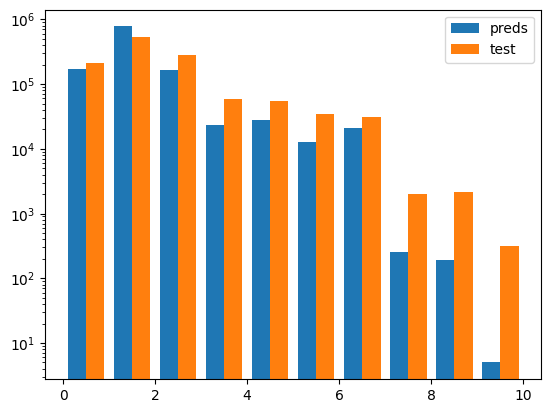

In [15]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

## 3. Classification And Regression Trees for Machine Learning (CART)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier(random_state=0, max_depth = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [18]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.43818416666666665

In [19]:
confusion_matrix(y_test, y_pred)

array([[     0, 208818,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 525821,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 282259,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  58351,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  55301,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  34197,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  30766,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2022,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2145,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,    320,      0,      0,      0,      0,      0,      0,
             0,      0]])

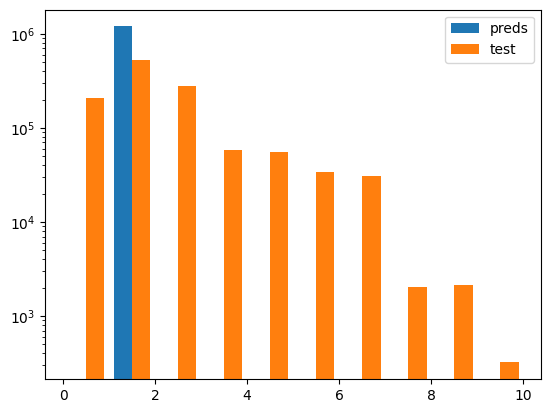

In [20]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

## 4. LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
model = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [23]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.43818416666666665

In [24]:
confusion_matrix(y_test, y_pred)

array([[     0, 208818,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 525821,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 282259,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  58351,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  55301,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  34197,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  30766,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2022,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2145,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,    320,      0,      0,      0,      0,      0,      0,
             0,      0]])

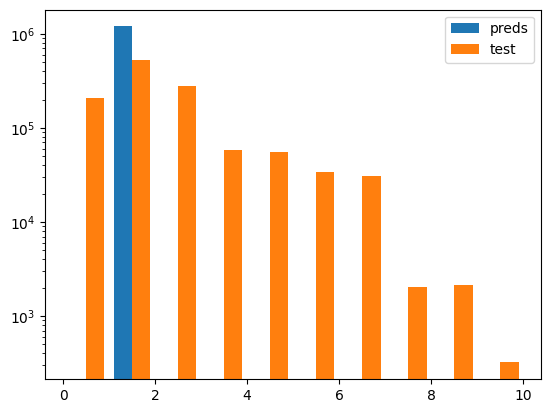

In [25]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

## 5. Support Vector Machine (SVM)

In [26]:
from sklearn import svm

In [27]:
model = svm.LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [28]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.43818416666666665

In [29]:
confusion_matrix(y_test, y_pred)

array([[     0, 208818,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 525821,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 282259,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  58351,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  55301,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  34197,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,  30766,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2022,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   2145,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,    320,      0,      0,      0,      0,      0,      0,
             0,      0]])

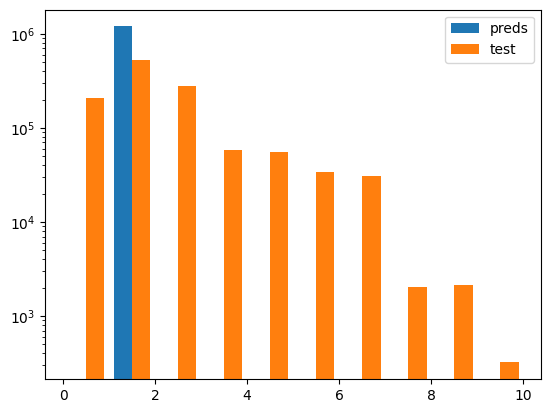

In [30]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

## 6. Random Forest

In [31]:
from sklearn import ensemble

In [32]:
model = ensemble.RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.5028125

In [34]:
confusion_matrix(y_test, y_pred)

array([[ 27014, 181399,    395,      0,      6,      4,      0,      0,
             0,      0],
       [ 12881, 488796,  24047,     14,     81,      2,      0,      0,
             0,      0],
       [   720, 199214,  81456,    140,    650,      1,     77,      1,
             0,      0],
       [   193,  42531,  13503,   1803,    181,      1,    139,      0,
             0,      0],
       [   202,  39155,  14010,      7,   1903,      0,     24,      0,
             0,      0],
       [  2301,  28404,   1832,     34,     11,   1615,      0,      0,
             0,      0],
       [     6,  13537,  15519,    547,    377,      0,    778,      2,
             0,      0],
       [     0,    585,    968,    297,     30,      0,    134,      8,
             0,      0],
       [     9,   1564,    426,      0,     61,     83,      0,      0,
             2,      0],
       [     5,    268,     27,      0,      3,     17,      0,      0,
             0,      0]])

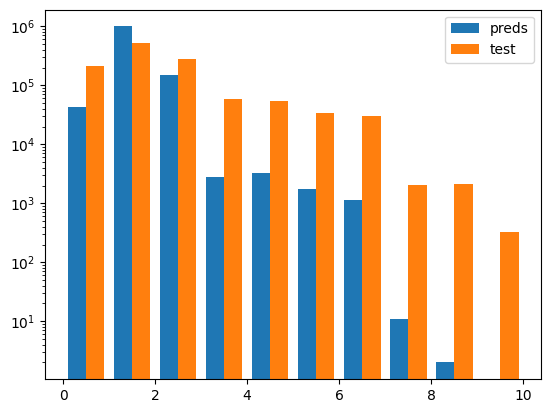

In [35]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

## 7. Gradient Boosting Classifier

In [3]:
from sklearn import ensemble
from matplotlib import pyplot as plt

In [37]:
model = ensemble.GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [38]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.4446408333333333

In [39]:
confusion_matrix(y_test, y_pred)

array([[     0, 208818,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 525391,    430,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 274747,   7492,      1,      0,      0,     19,      0,
             0,      0],
       [     0,  53305,   5012,     11,      0,      0,     23,      0,
             0,      0],
       [     0,  54717,    578,      2,      0,      0,      4,      0,
             0,      0],
       [     0,  33572,    160,      0,      0,    465,      0,      0,
             0,      0],
       [     0,  27462,   3225,     14,      0,      0,     65,      0,
             0,      0],
       [     0,   1490,    321,     31,      0,      0,     35,    145,
             0,      0],
       [     0,   2100,     10,      0,      0,     35,      0,      0,
             0,      0],
       [     0,    317,      0,      0,      0,      3,      0,      0,
             0,      0]])

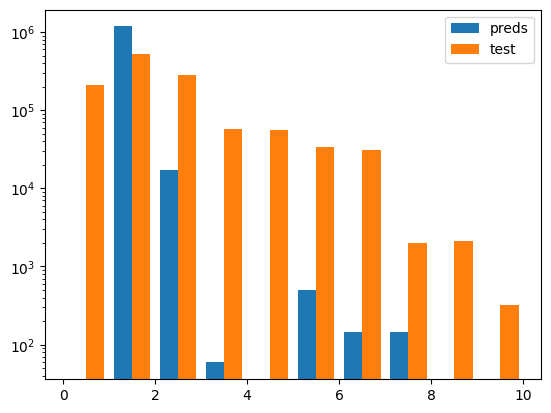

In [40]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

In [15]:
indexes = ['Рекурентна нейронна мережа', 'Багатошаровий персептрон', 'Дерева рішень', 'Логістична регресія', 'SVM', 'Випадковий ліс', 'Метод найшвидшого бустінгу'][::-1]
values = [43.81, 55.54, 43.81, 43.81, 43.81, 50.28, 44.46][::-1]

Text(0.5, 0, 'Точність, %')

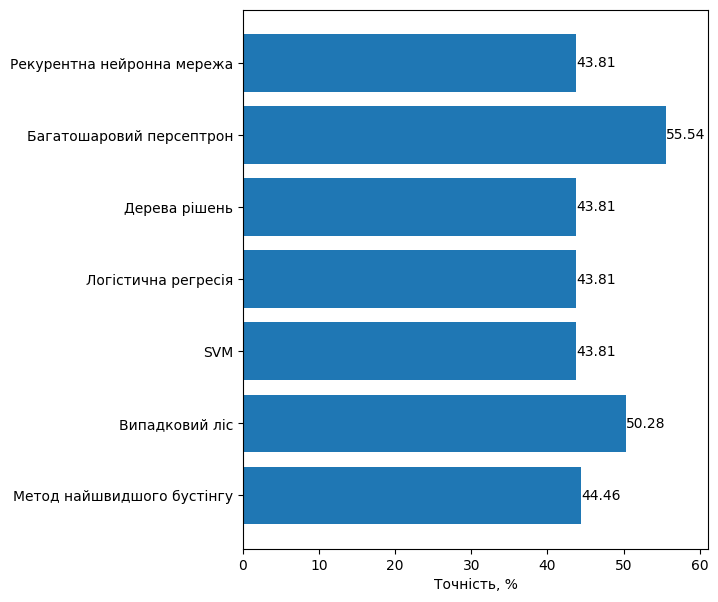

In [27]:
fig, ax = plt.subplots(figsize=(6, 7))
plt.margins(x=0.1)
bars = ax.barh(indexes, values)
ax.bar_label(bars)
plt.xlabel('Точність, %')